In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv


#### Import modules needed to analyze Deluxe dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Understanding Deluxe dataset

In [3]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/online-store-sales-data/Sales-Export_2019-2020.csv")

# Dataset info
print(df.info())

# Dataset Shape
print(f"\nDeluxe dataset has {df.shape[0]} rows and {df.shape[1]} columns \n")

# Dataset Columns
print(f"The dataset has the following columns: \n{df.columns} \n" )

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.3+ KB
None

Deluxe dataset has 1000 rows and 10 columns 

The dataset has the following columns: 
Index(['country', ' order_value_EUR ', ' cost ', 'date', 'category',
       'customer_name', 'sales_manager', 'sales_rep', 'device_type',
       'order_id'],
      dtype='ob

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


## Data Cleaning and Feature Engineering

In [4]:
# Removing spaces in column names
df.columns = df.columns.str.strip()

# Check duplicate rows
print(f"The sum of duplicted rows: {df.duplicated().sum()} \n")

# Count total nulls per column 
print(f"Total nulls: \n{df.isnull().sum()} \n")

# Rename 'order_value_EUR' to 'revenue.'
df.rename(columns = {"order_value_EUR":"revenue"}, inplace = True)

# Convert date from object type to datetime type
df["date"] = pd.to_datetime(df['date'])

# Remove ',' on revenue and convert the column from object to float type
df['revenue'] = df['revenue'].str.replace(",","", regex = True).astype('float')

df.info()

The sum of duplicted rows: 0 

Total nulls: 
country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        1000 non-null   object        
 1   revenue        1000 non-null   float64       
 2   cost           1000 non-null   float64       
 3   date           1000 non-null   datetime64[ns]
 4   category       1000 non-null   object        
 5   customer_name  1000 non-null   object        
 6   sales_manager  1000 non-null   object        
 7   sales_rep      1000 non-null   object        
 8   device_type    1000 non-null   object        
 9   order_id       1000 non-null   object        
dtypes: date

In [5]:
# Create new features, namely: profit, profit_margin, year, month, week_day
df['profit'] = round(df.revenue - df.cost,2)
df['profit_margin'] = round((df.profit / df.revenue)* 100, 2)
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['week_day'] = df['date'].dt.day_name()

df.to_csv("Deluxe_Cleaned_data.csv", index = False)
df.head()

,country,revenue,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,profit,profit_margin,year,month_num,month,week_day
0,Sweden,17524.02,14122.61,2020-02-12,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,3401.41,19.41,2020,2,February,Wednesday
1,Finland,116563.40,92807.78,2019-09-26,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,23755.62,20.38,2019,9,September,Thursday
2,Portugal,296465.56,257480.34,2019-07-11,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,38985.22,13.15,2019,7,July,Thursday
3,Portugal,74532.02,59752.32,2020-04-02,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,14779.70,19.83,2020,4,April,Thursday
4,Spain,178763.42,146621.76,2019-12-22,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,32141.66,17.98,2019,12,December,Sunday


* **Cleaning**: Removed commas from revenue values, converted to float, parsed dates into datetime format, and stripped column names
* **Feature Engineering**: Added profit, profit margin, year, month, and weekday fields.
* **Validation**: No missing values or duplicates were found.

# 1. SALES ANALYSIS

Understand revenue drivers, seasonality, and growth

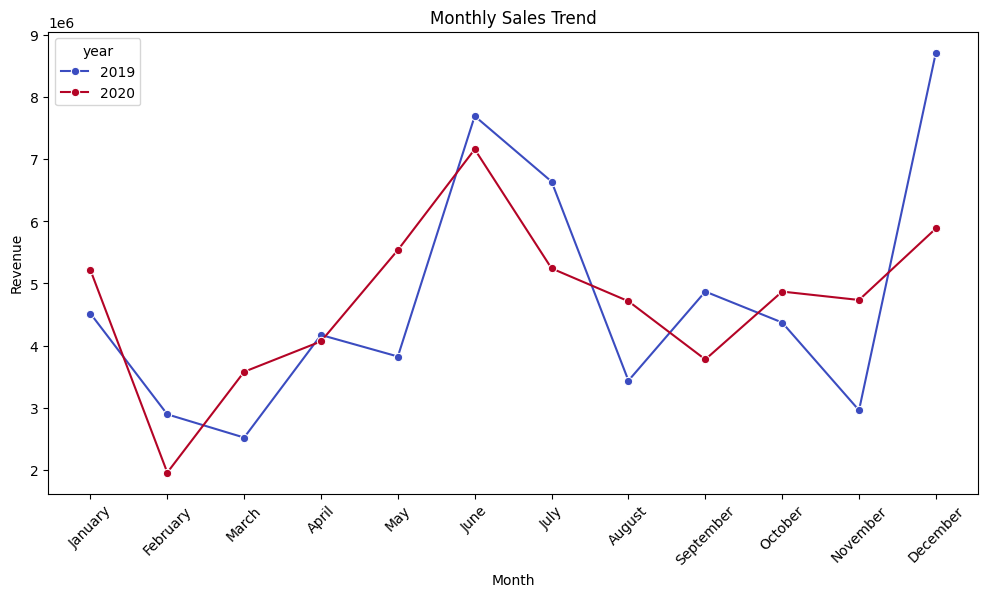

In [6]:
# Aggregate revenue/order_value per year+month 
monthly_sales = df.groupby(['year','month_num','month'])['revenue'].sum().reset_index()

# Sort by year and month_num 
monthly_sales = monthly_sales.sort_values(by=['year','month_num']) 

plt.figure(figsize=(12,6)) 
sns.lineplot(data=monthly_sales, x='month', y='revenue', hue='year', marker='o', palette = 'coolwarm') 
plt.title("Monthly Sales Trend") 
plt.xlabel("Month") 
plt.ylabel("Revenue") 
plt.xticks(rotation=45) 
plt.show()

      category      revenue
4     Clothing  17661682.13
6        Games  15321623.45
1   Appliances  15139668.73
5  Electronics  14482077.62
3        Books  13179978.90


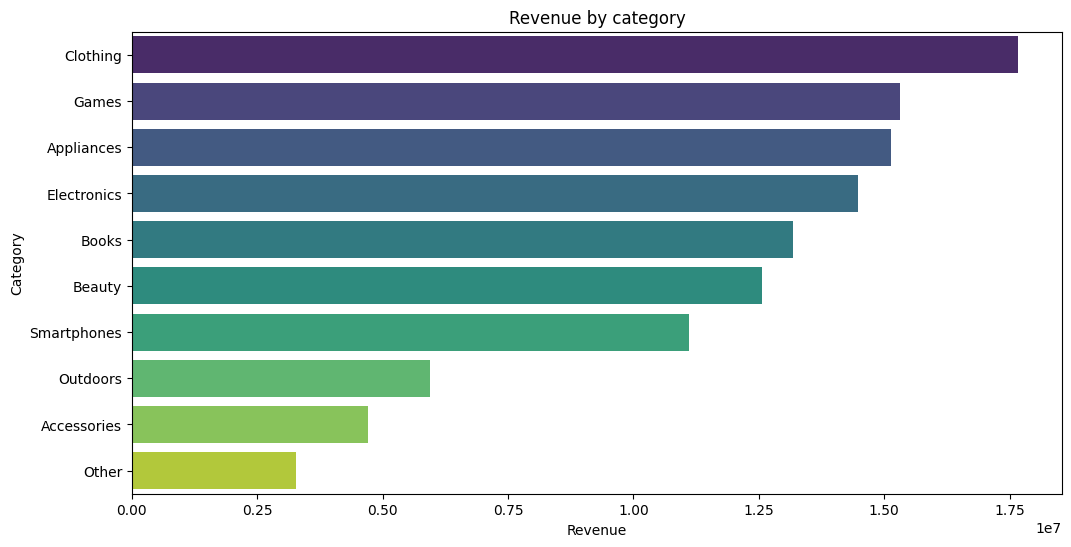

In [7]:
# Revenue by category
category_revenue = df.groupby('category')['revenue'].sum().reset_index()
category_revenue = category_revenue.sort_values(by = 'revenue', ascending = False)
print(category_revenue.head())

plt.figure(figsize=(12,6))
sns.barplot(data = category_revenue, y = 'category', x = 'revenue', hue = 'category', palette = 'viridis')
plt.title('Revenue by category')
plt.xlabel("Revenue")
plt.ylabel('Category')
# plt.xticks(rotation = 45)
plt.show()

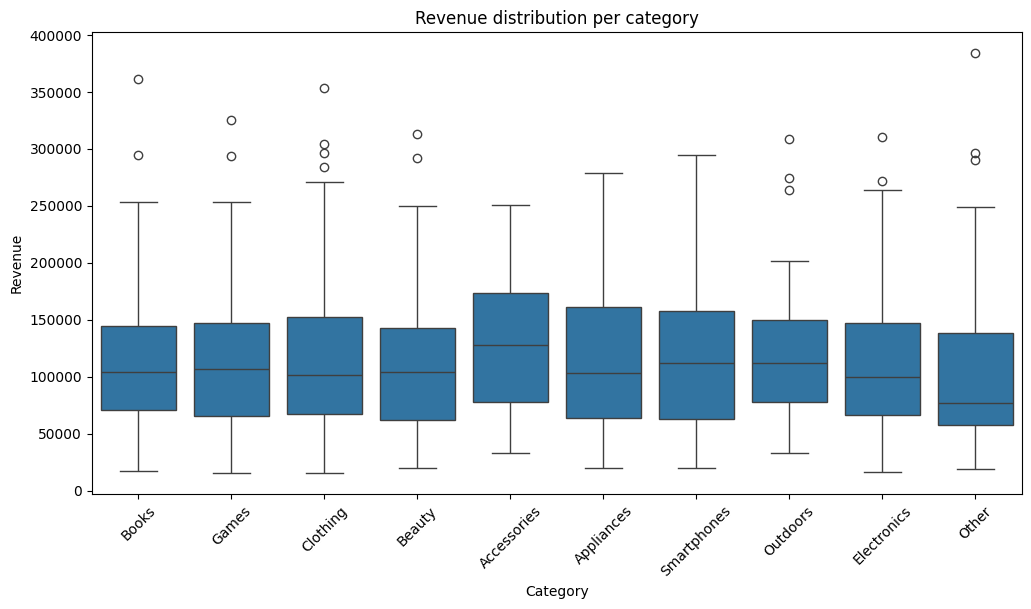

In [8]:
#Revenue distribution per category

plt.figure(figsize = (12,6))
sns.boxplot(data = df, x="category", y="revenue")
plt.title("Revenue distribution per category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation = 45)
plt.show()

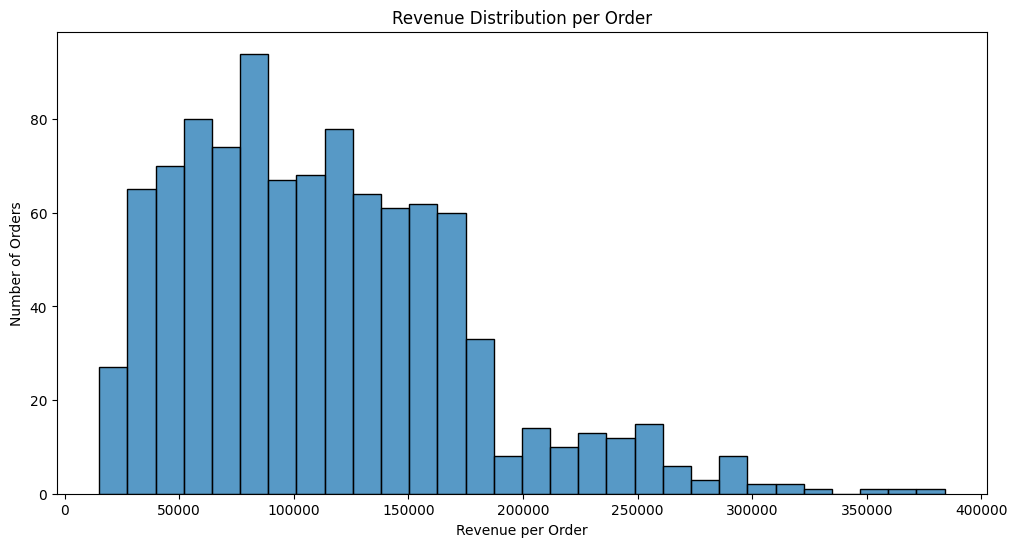

In [9]:
# Revenue Distribution per Order
plt.figure(figsize = (12,6))
sns.histplot(df["revenue"], bins=30)
plt.title("Revenue Distribution per Order")
plt.xlabel("Revenue per Order")
plt.ylabel("Number of Orders")
plt.show()

* **Monthly Sales Trend**: Revenue shows clear seasonality. 2020 has a stronger performance in Q2 compared to 2019, with mid‑year peaks.

* **Revenue by Category**: Clothing is the top revenue generator, followed by Games, Appliances, Electronics, and Books.

* **Revenue Distribution per Category**: Some categories (Clothing, Electronics) have wide variance and high‑value outliers; others (Books, Accessories) are more consistent.

* **Revenue per Order**: Most orders fall below €150,000, but there is a long tail of very high‑value orders.

# 2. Profitability and Cost Analysis

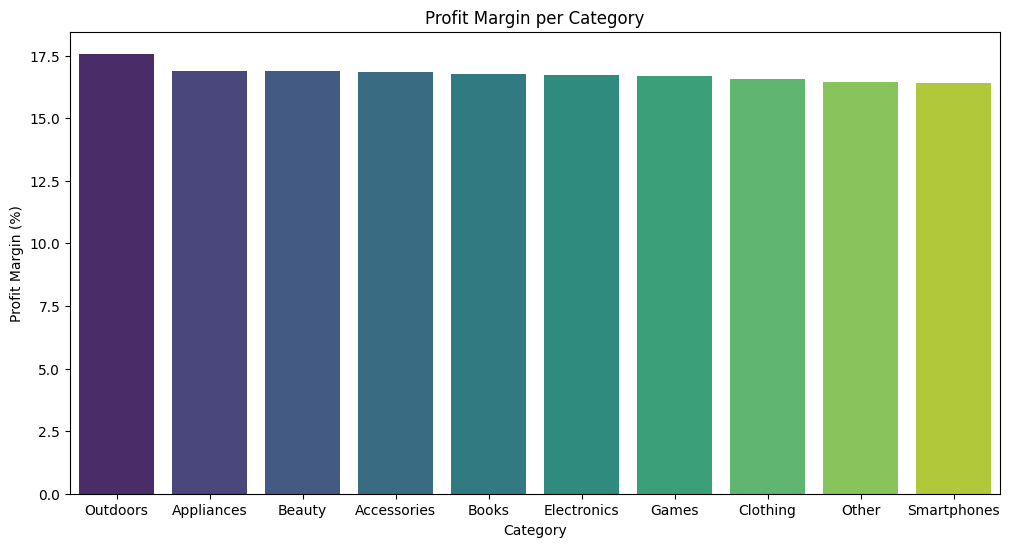

In [10]:
# Profit Margin per Category

# Aggregate mean profit margin per category 
category_margin = df.groupby('category')['profit_margin'].mean().reset_index()
category_margin = category_margin.sort_values(by='profit_margin', ascending=False)

plt.figure(figsize = (12,6))
sns.barplot(data=category_margin, x="category", y="profit_margin",hue= 'category', palette = 'viridis')
plt.title("Profit Margin per Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.show()

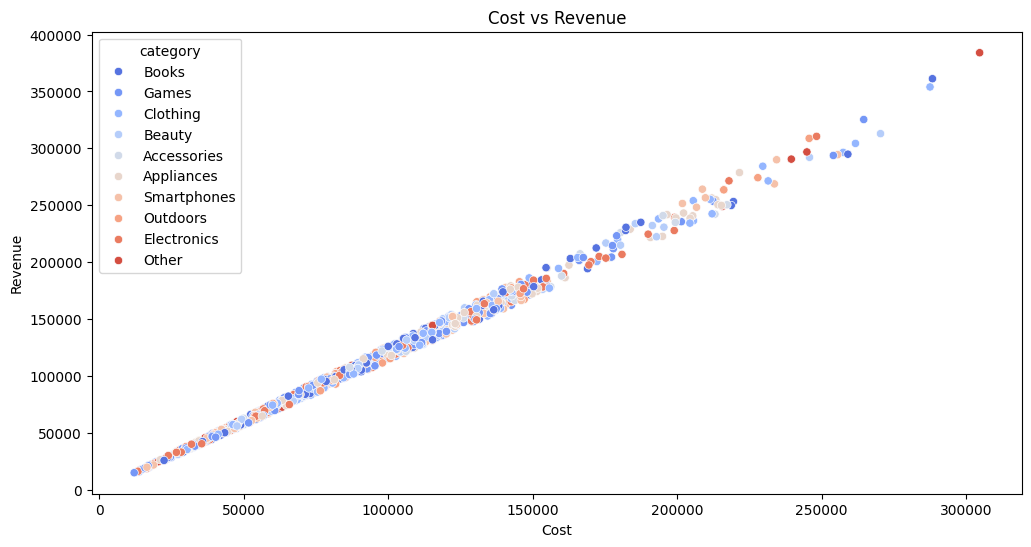

In [11]:
# Cost vs Revenue

plt.figure(figsize = (12,6))
sns.scatterplot(data = df, x = 'cost', y = 'revenue', hue = 'category', palette = 'coolwarm')
plt.title('Cost vs Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()

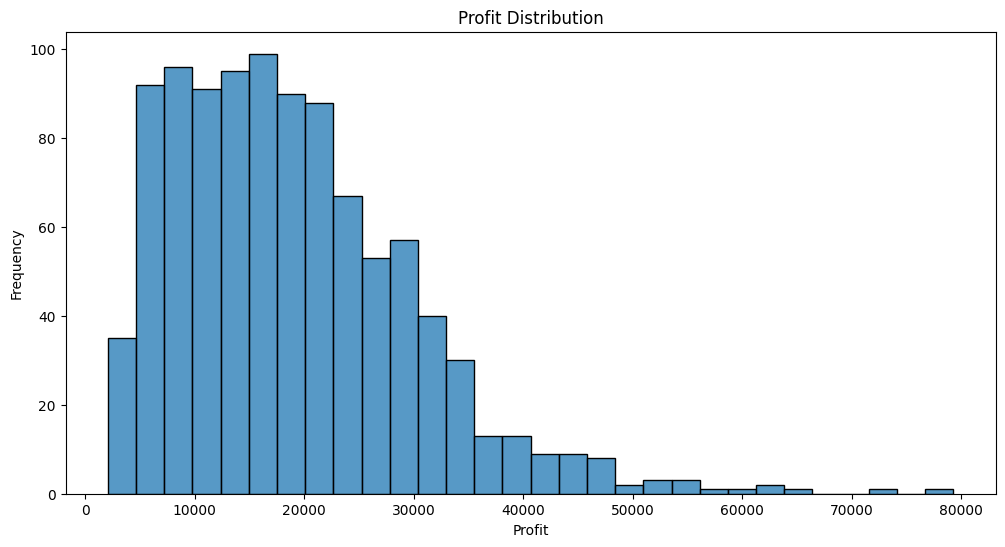

In [12]:
# Profit Distribution

plt.figure(figsize = (12,6))
sns.histplot(df["profit"], bins=30)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


* **Profit Margin per Category**: Outdoors and Appliances deliver the highest average margins; Smartphones and “Other” categories are lowest.

* **Cost vs Revenue**: Strong positive correlation, but slope differs by category. Outliers suggest unusual pricing or bundling.

* **Profit Distribution**: Most orders yield modest profit; a few generate exceptionally high profit.

# 3. Product Category Analysis

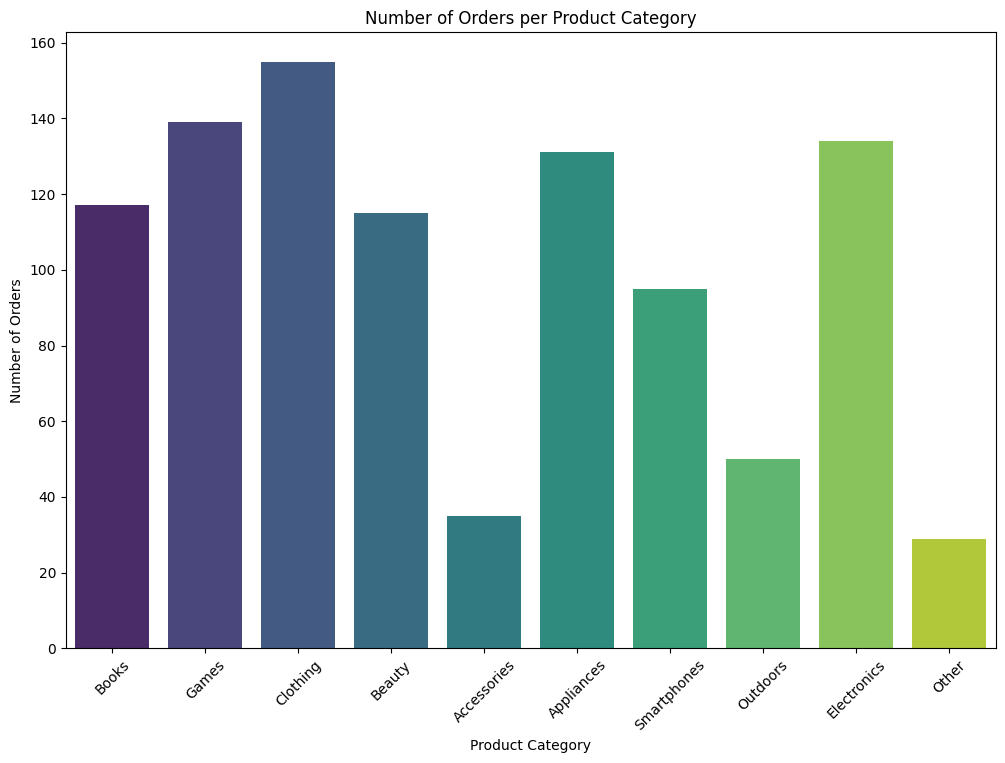

In [13]:
# Orders Count by Category

plt.figure(figsize=(12,8))
sns.countplot(data=df,x="category", hue = 'category', palette = 'viridis')
plt.title("Number of Orders per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

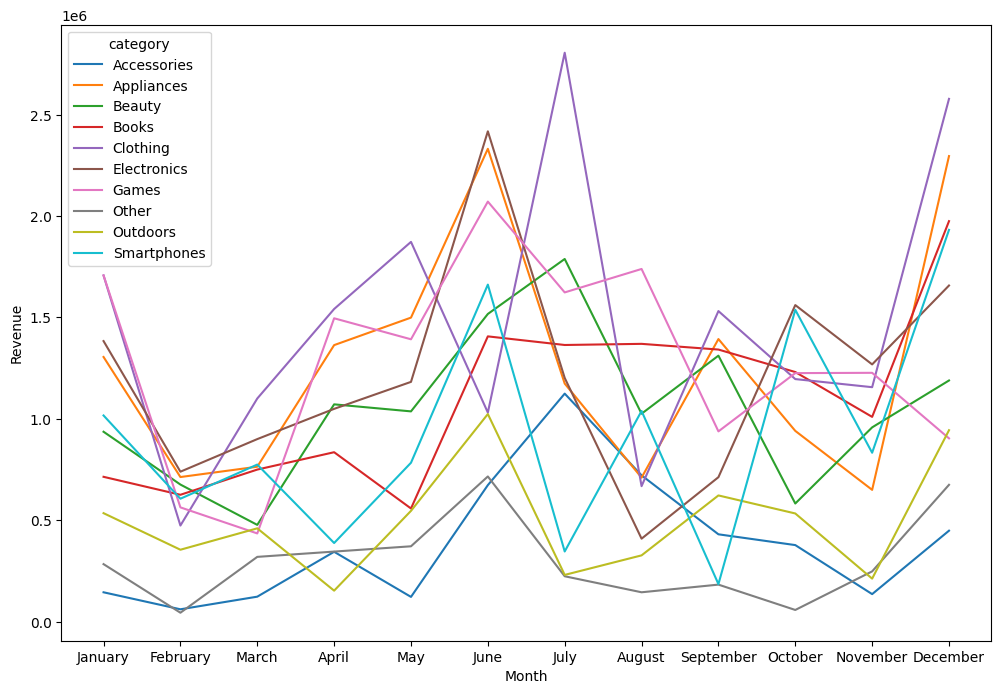

In [14]:
# Category Seasonality

cat_monthly = df.groupby(['month_num','month', 'category'])['revenue'].sum().reset_index()
cat_monthly = cat_monthly.sort_values(by = 'month_num')

plt.figure(figsize=(12,8))
sns.lineplot(data=cat_monthly,x="month",y="revenue",hue="category")
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


* **Order Counts**: Games and Clothing lead in order volume, though revenue leaders differ.

* **Category Seasonality**: Categories peak in different months (e.g., Apparel in summer, Electronics near year‑end), showing the need for tailored promotional calendars.

# 4. Customer Analysis

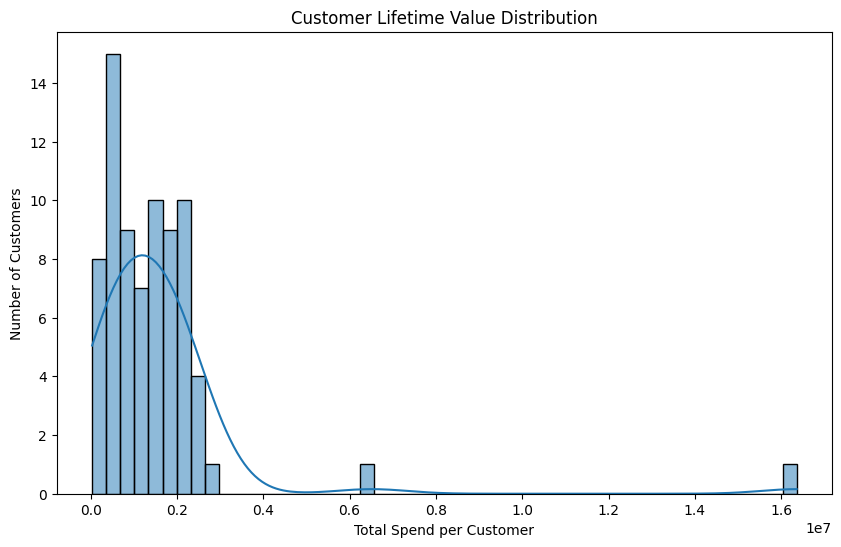

In [15]:
# Customer Lifetime Value (CLV) Distribution

customer_df = (df.groupby("customer_name")["revenue"].sum().reset_index())

plt.figure(figsize=(10,6))
sns.histplot(customer_df["revenue"], bins=50, kde=True)
plt.xlabel("Total Spend per Customer")
plt.ylabel("Number of Customers")
plt.title("Customer Lifetime Value Distribution")
plt.show()

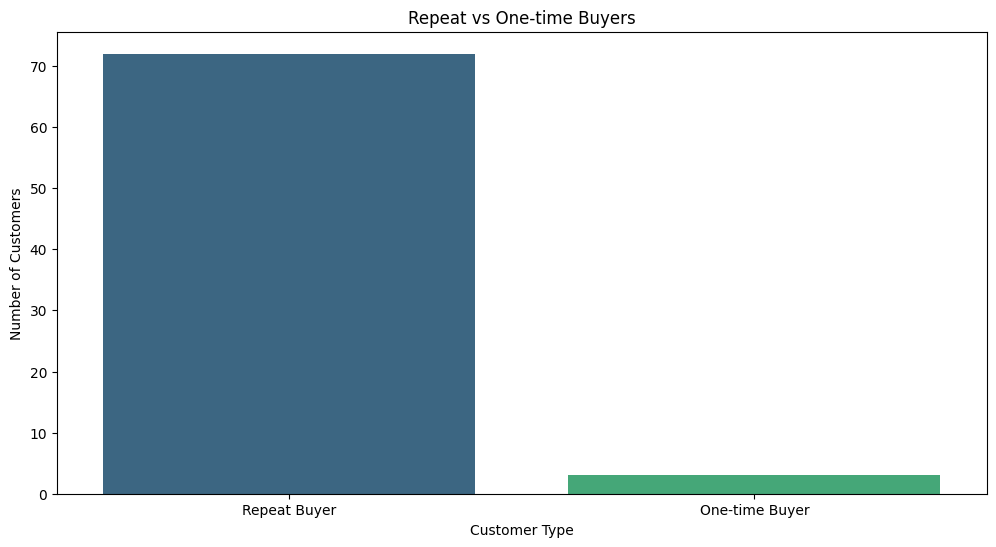

In [16]:
# Repeat vs One-Time Buyers

purchase_count = (df.groupby("customer_name")["order_id"].nunique().reset_index())

purchase_count["purchase_type"] = purchase_count["order_id"].apply(
    lambda x: "One-time Buyer" if x == 1 else "Repeat Buyer"
)

plt.figure(figsize=(12,6))
sns.countplot(data=purchase_count, x="purchase_type", hue = 'purchase_type', palette = 'viridis')
plt.title("Repeat vs One-time Buyers")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.show()




* **Customer Lifetime Value (CLV)**: Highly skewed; a small number of customers contribute disproportionately to revenue.

* **Repeat vs. One-Time Buyers**: Repeat buyers outnumber one-time buyers, indicating strong loyalty. However, converting single‑order customers into repeat buyers remains an opportunity.

# 5. Country / Market Analysis

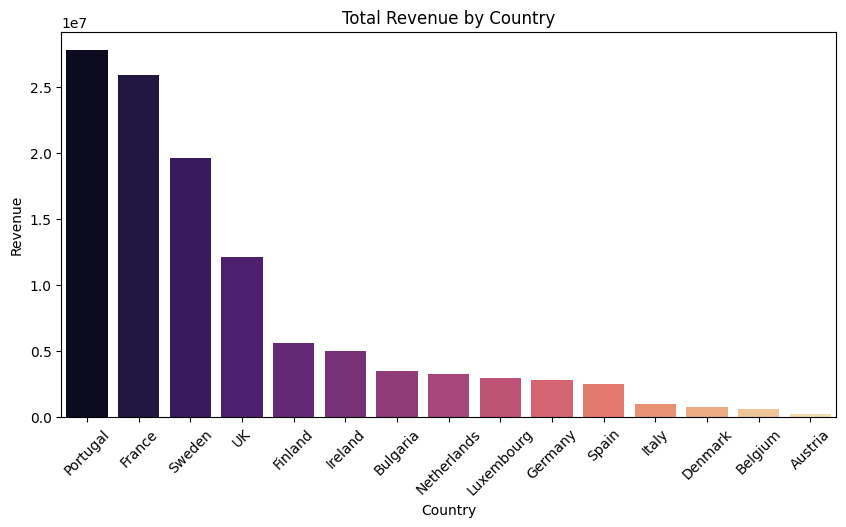

In [17]:
# Total Revenue by Country

# Group data by country and sum revenue
country_df = (df.groupby("country")["revenue"].sum().reset_index())
# Sort values for better visualization
country_df = country_df.sort_values(by="revenue",ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=country_df,x="country",y="revenue", hue = 'country', palette = 'magma')

plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


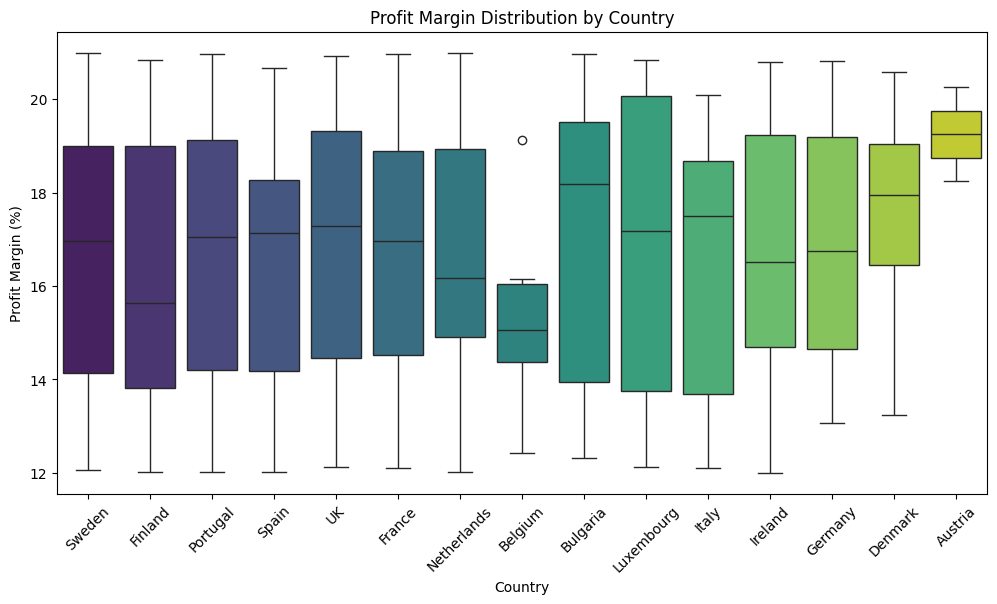

In [18]:
# Profit Margin by Country

plt.figure(figsize=(12, 6))
sns.boxplot(data=df,x="country",y="profit_margin", hue = 'country', palette = 'viridis')
plt.title("Profit Margin Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()


* **Revenue by Country**: Portugal, France, and Sweden are the top markets, followed by the UK and Finland.

* **Profit Margin by Country**: Margins vary widely; some countries consistently deliver higher profitability, while others show volatility.

# 6. Device Type Analysis

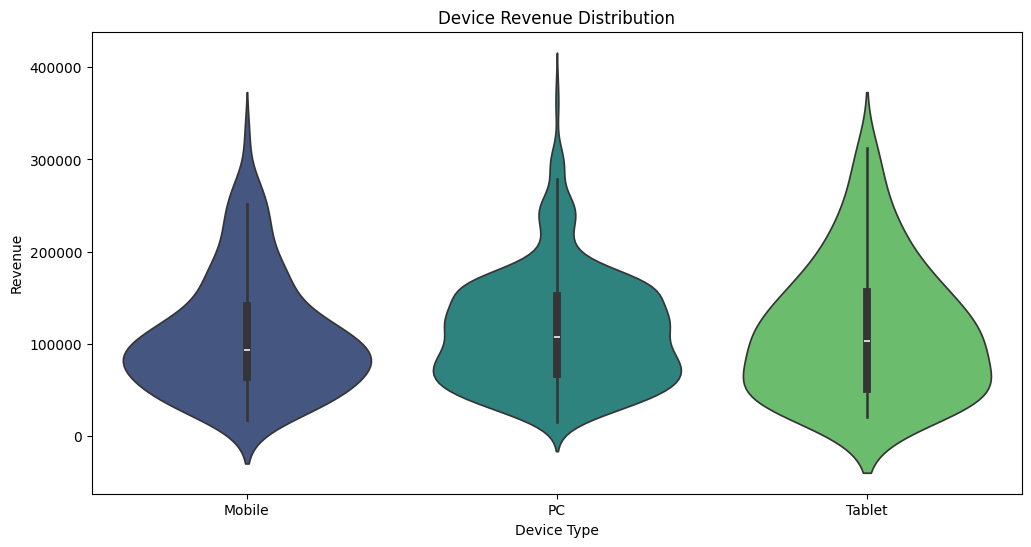

In [19]:
# Device Revenue Distribution

plt.figure(figsize = (12,6))
sns.violinplot(data = df, x = 'device_type', y = 'revenue', hue = 'device_type', palette = 'viridis')
plt.title("Device Revenue Distribution")
plt.xlabel("Device Type")
plt.ylabel("Revenue")
plt.show()

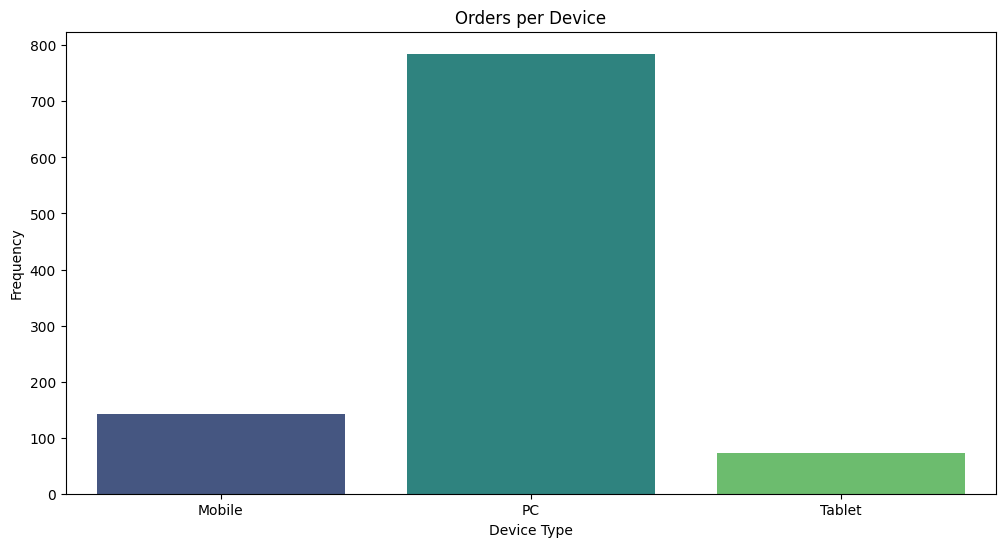

In [20]:
# Orders per Device

plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'device_type', hue = 'device_type', palette = 'viridis')
plt.title("Orders per Device")
plt.xlabel("Device Type")
plt.ylabel("Frequency")
plt.show()

* **Revenue Distribution by Device**: PC orders also show a wider spread and higher median revenue. Mobile and Tablet orders are fewer and generally lower in value.

* **Orders per Device**: PC accounts for the majority of orders, far surpassing Mobile and Tablet. This indicates that most customers prefer desktop environments for placing orders.

# 7. Sales Team Performance

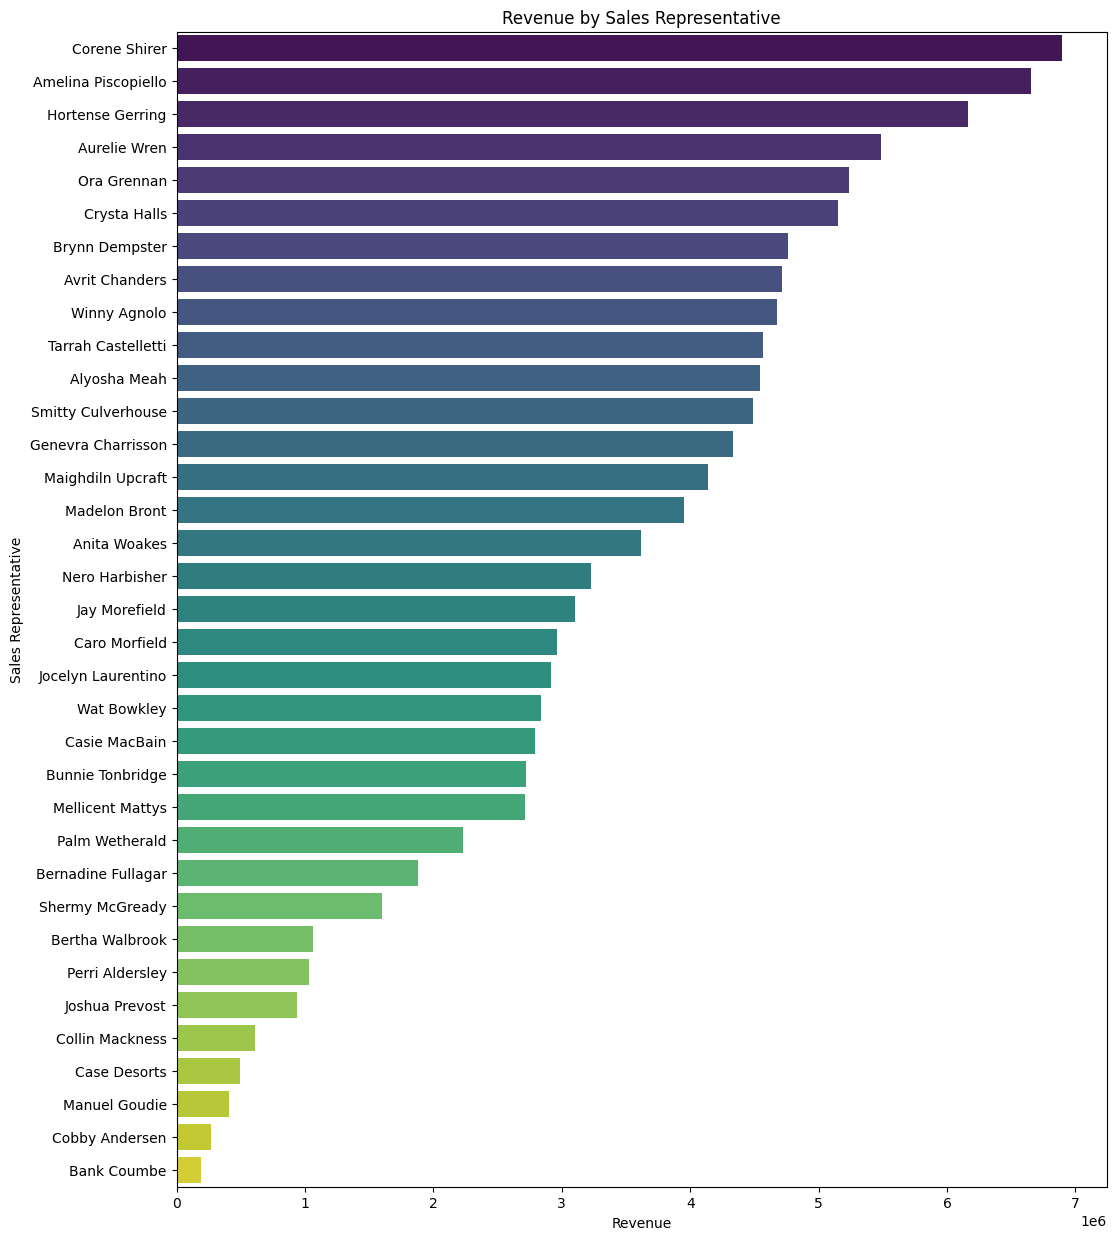

In [21]:
# Revenue by Sales Representative

# Group data by sales representative and sum revenue

rep_total = df.groupby('sales_rep')['revenue'].sum().reset_index()
rep_total = rep_total.sort_values(by = 'revenue', ascending = False)

plt.figure(figsize= (12,15))
sns.barplot(data = rep_total, x = 'revenue', y = 'sales_rep', hue = 'sales_rep', palette = 'viridis')
plt.title('Revenue by Sales Representative')
plt.xlabel('Revenue')
plt.ylabel('Sales Representative')
plt.show()


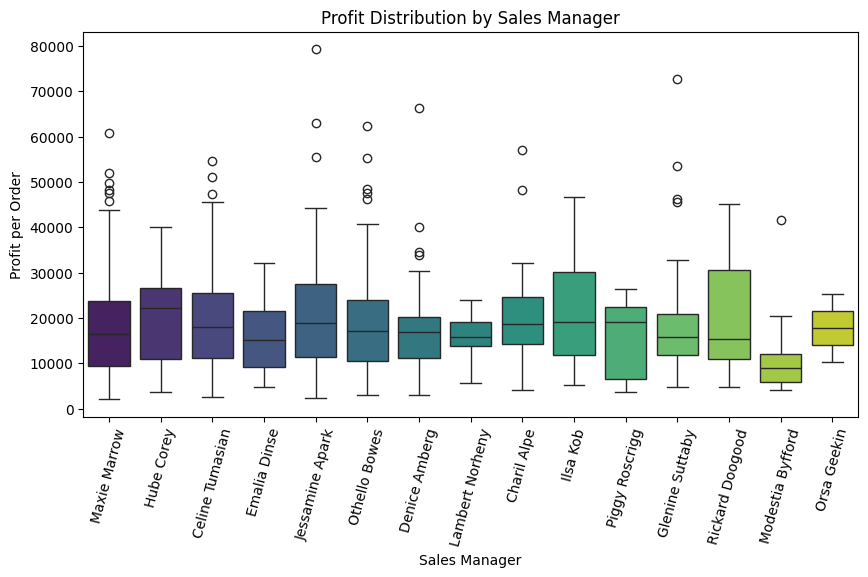

In [22]:
# Profit by Sales Manager

plt.figure(figsize=(10, 5))
sns.boxplot(data=df,x="sales_manager",y="profit", hue = 'sales_manager', palette = 'viridis')
plt.title("Profit Distribution by Sales Manager")
plt.ylabel("Profit per Order")
plt.xlabel("Sales Manager")
plt.xticks(rotation=75)
plt.show()


* **Revenue by Sales Rep**: Clear variance among reps, with top performers driving substantial revenue.

* **Profit by Sales Manager**: Some managers oversee consistently higher‑profit orders, suggesting differences in strategy or account mix.

# 8. Time-Series and Trend Analysis

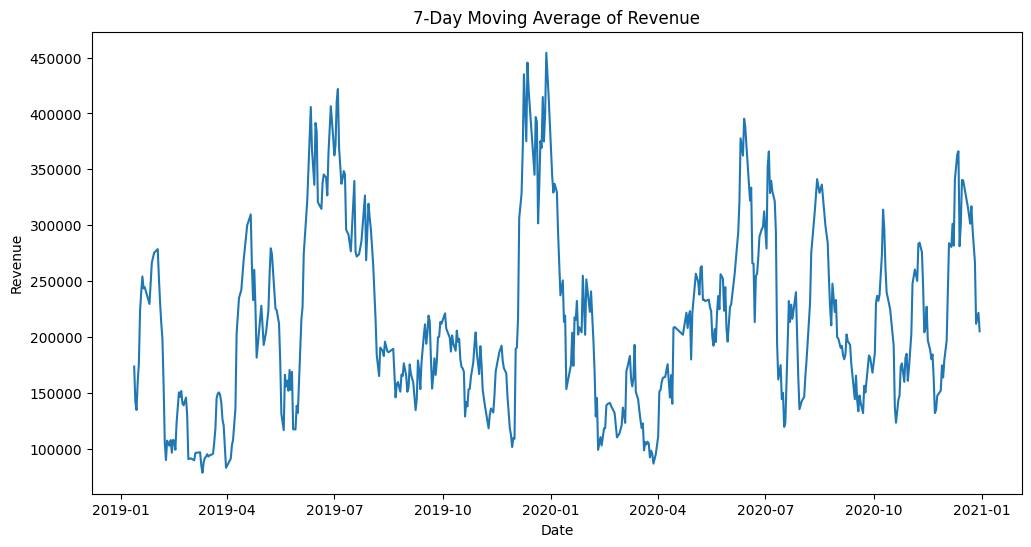

In [23]:
# Moving Average Revenue

#daily total revenue
daily_sales = (df.groupby("date")["revenue"].sum().reset_index())

# Calculate Moving Average (7-day example)
daily_sales["moving_avg"] = (daily_sales["revenue"].rolling(window=7).mean())

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales,x="date",y="moving_avg")
plt.title("7-Day Moving Average of Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

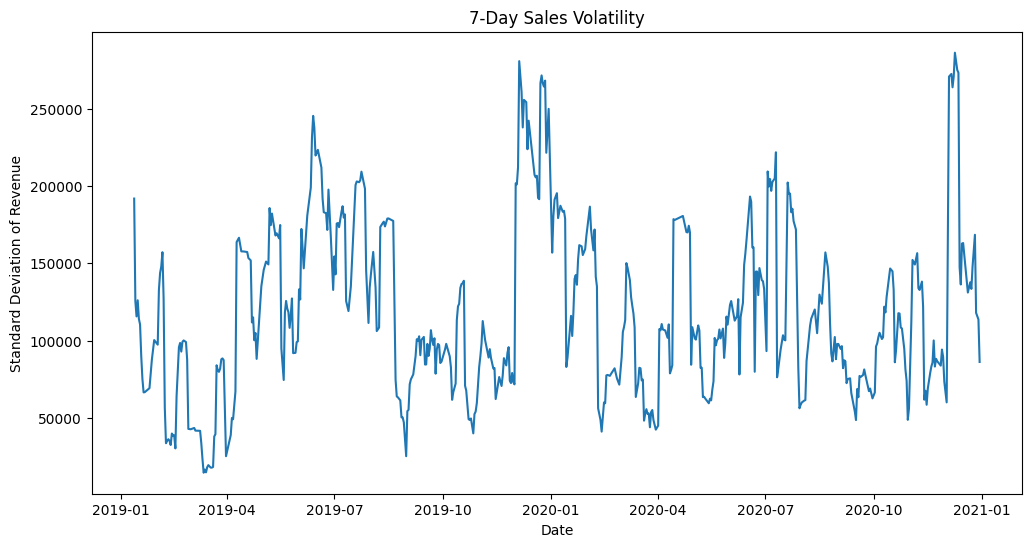

In [24]:
# Sales Volatility

# Calculate Rolling Standard Deviation
daily_sales["std_dev"] = (daily_sales["revenue"].rolling(window=7).std())

plt.figure(figsize=(12, 6))

sns.lineplot(data=daily_sales,x="date",y="std_dev")

plt.title("7-Day Sales Volatility")
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Revenue")
plt.show()

* **Moving Average**: 7‑day rolling averages reveal underlying revenue trends, smoothing daily volatility.

* **Volatility**: Periods of high standard deviation align with promotions or seasonal demand spikes.

# 9. Basket and Order Behavior

Basket & Order Behavior analysis focuses on how much customers spend per order, rather than who or what they buy. 
This helps identify:
* High-value orders

* Upsell opportunities

* Pricing strategy improvements

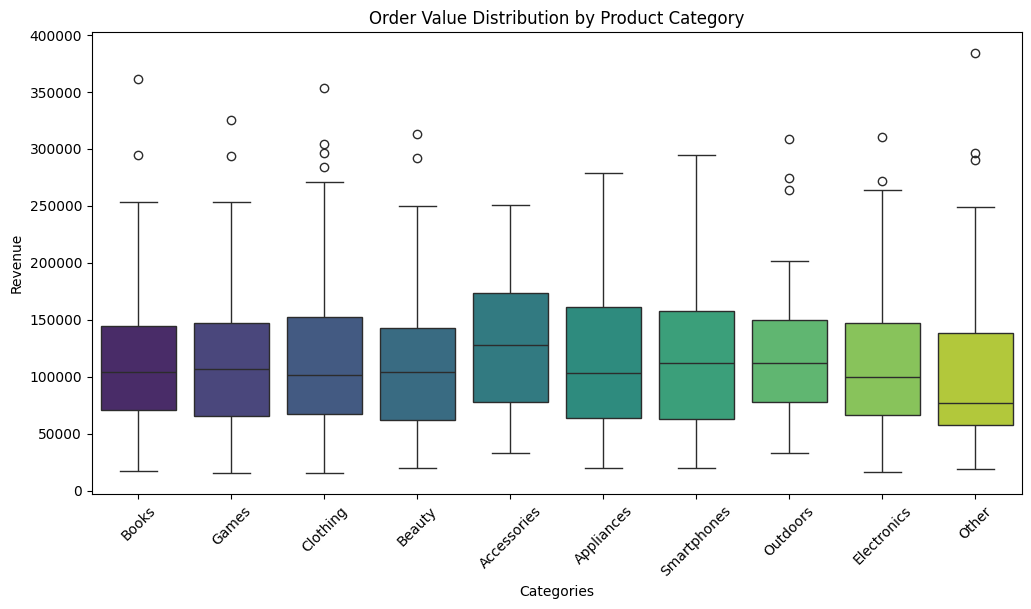

In [25]:
# Order Value Segmentation by Category

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="category", y="revenue", hue = 'category', palette = 'viridis')
plt.title("Order Value Distribution by Product Category")
plt.xlabel("Categories")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

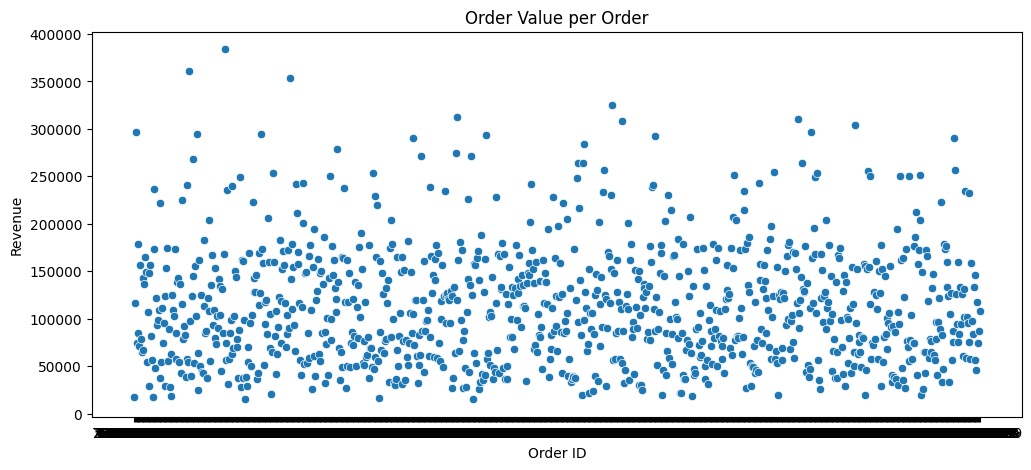

In [26]:
# High-Value Order Identification
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x="order_id", y="revenue")
plt.title("Order Value per Order")
plt.xlabel("Order ID")
plt.ylabel("Revenue")
plt.show()

* **Order Value by Category**: Categories differ in average basket size; Electronics and Clothing show high variance.

* **High‑Value Orders**: Outliers highlight VIP customers or bulk purchases, requiring special handling.

# 10. Executive KPI Dashboard

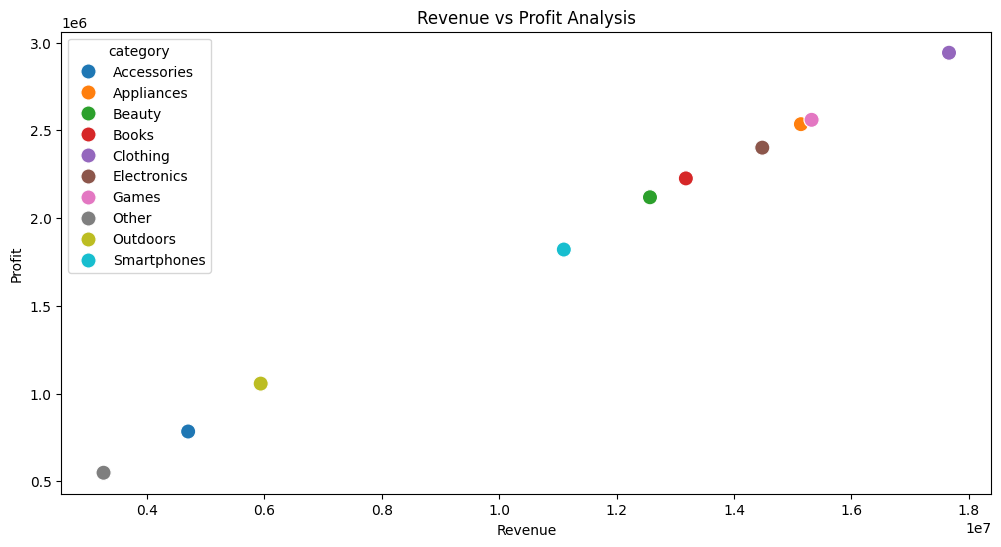

In [27]:
# Revenue vs Profit Analysis

kpi_df = (df.groupby("category")[["revenue", "profit"]].sum().reset_index())


plt.figure(figsize = (12,6))
sns.scatterplot(data = kpi_df, x = 'revenue', y = 'profit', s = 120, hue = 'category')
plt.title('Revenue vs Profit Analysis')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()

* **Revenue vs Profit Analysis**: Categories show a clear positive correlation between revenue and profit.

* **Top performers**: Clothing, Games, and Appliances cluster in the upper-right quadrant, indicating both high revenue and high profit.

* **Strategic insight**: Categories with high revenue but lower profit (e.g., Electronics) may benefit from margin optimization, while high-margin, low-revenue categories (e.g., Outdoors) offer niche growth opportunities.